# Final Project: Breath Alcohol Tests in a College Town
**Completed By Team 5:** Marshall Ferguson, Mia Simms, Nirosha Telu, Asaad Khattab
***

Ames, Iowa, USA is the home of Iowa State University, a land grant university with over 36,000 students. By comparison, the city of Ames, Iowa, itself only has about 65,000 residents. As with any other college town, Ames has had its fair share of alcohol-related incidents. (For example, Google 'VEISHEA riots 2014'.) We will take a look at some breath alcohol test data from Ames that is published by the State of Iowa.

The data file `'breath_alcohol_ames.csv'` contains 1,556 readings from breath alcohol tests administered by the Ames and Iowa State University Police Departments from January 2013 to December 2017. The columns in this data set are `year`, `month`, `day`, `hour`, `location`, `gender`, `Res1`, `Res2`.

***

### Part 1.

- Import pandas aliased as `pd`
- Read `breath_alcohol_ames.csv` into your workspace using the `read_csv()` function. Save it as `ba_data`
- Look at the format of your dataset using the `head()` function
- Count how many tests were administered in each year using the `value_counts()` function. Assign the results to `ba_year`

#### Load Data from CSV File

In [176]:
# Import essential packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_context('notebook')

#### Data Collection

In [177]:
# Read the data into your workspace
path = 'TEAM5breath_alcohol_ames.csv'
ba_data = pd.read_csv(path)

#### Data Definition 
##### Explore the Data

In [178]:
# Quickly inspect the data
ba_data.head()

,year,month,day,hour,location,gender,Res1,Res2
0,2017,12,17,1,Ames PD,M,0.046,0.046
1,2017,12,14,3,ISU PD,F,0.121,0.120
2,2017,12,10,5,ISU PD,F,0.068,0.067
3,2017,12,10,3,ISU PD,F,0.077,0.077
4,2017,12,9,2,ISU PD,M,0.085,0.084


In [133]:
ba_data.tail(3)

,year,month,day,hour,location,gender,Res1,Res2
1553,2013,1,1,3,Ames PD,M,0.090,0.090
1554,2013,1,1,2,ISU PD,F,0.132,0.131
1555,2013,1,1,0,ISU PD,M,0.130,0.130


In [134]:
# Dimensions of the dataset. #(samples,features)
print("There are", ba_data.shape[0], "Rows(Observations).")
print("There are", ba_data.shape[1], "Columns(Features).")
ba_data.shape

There are 1556 Rows(Observations).
There are 8 Columns(Features).


(1556, 8)

In [135]:
ba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      1556 non-null   int64  
 1   month     1556 non-null   int64  
 2   day       1556 non-null   int64  
 3   hour      1556 non-null   int64  
 4   location  1556 non-null   object 
 5   gender    1527 non-null   object 
 6   Res1      1556 non-null   float64
 7   Res2      1556 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 97.4+ KB


We see from df.info() that the 'gender' column has missing values.

In [136]:
ba_data.describe()

,year,month,day,hour,Res1,Res2
count,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000
mean,2014.775707,6.258355,15.872108,5.122751,0.117526,0.117085
std,1.426150,3.363903,8.676373,6.460941,0.067389,0.067183
min,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2013.000000,3.000000,8.000000,2.000000,0.078000,0.078750
50%,2015.000000,6.000000,16.000000,3.000000,0.123000,0.123000
75%,2016.000000,9.000000,24.000000,4.000000,0.163250,0.163000
max,2017.000000,12.000000,31.000000,23.000000,0.352000,0.351000


In [137]:
ba_data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1556.0,2014.775707,1.426150,2013.0,2013.00000,2015.000,2016.00000,2017.000
month,1556.0,6.258355,3.363903,1.0,3.00000,6.000,9.00000,12.000
day,1556.0,15.872108,8.676373,1.0,8.00000,16.000,24.00000,31.000
hour,1556.0,5.122751,6.460941,0.0,2.00000,3.000,4.00000,23.000
Res1,1556.0,0.117526,0.067389,0.0,0.07800,0.123,0.16325,0.352
Res2,1556.0,0.117085,0.067183,0.0,0.07875,0.123,0.16300,0.351


In [227]:
range_min_max = ba_data.aggregate([min, max]).T
range_min_max

,min,max
year,2013,2017
month,1,12
day,1,31
hour,0,23
departments,AMES PD,ISU PD
res1,0,0.352
res2,0,0.351
mean_res,0,0.3515


#### Count how many tests were administered in each year using the value_counts() function.

In [224]:
# Obtain counts for each year 
pd.DataFrame(ba_data['year'].value_counts())

,year
2013,397
2014,344
2015,286
2016,269
2017,260


- The highest number of tests administered were 397 tests in 2013.
- The lowest number of tests administered were 260 tests in 2017.

*** 
## Data Wrangling
### Part 2.

There are two police departments in the data set: the Iowa State University Police Department and the Ames Police Department. Which one administers more breathalyzer tests?


- Group and summarize the data by location with the `value_counts` function. Save this data as `pds`.

#### Rename Columns

In [181]:
ba_data = ba_data.rename(columns = {
    'location':'departments',
})
ba_data

,year,month,day,hour,departments,gender,res1,res2
0,2017,12,17,1,Ames PD,M,0.046,0.046
1,2017,12,14,3,ISU PD,F,0.121,0.120
2,2017,12,10,5,ISU PD,F,0.068,0.067
3,2017,12,10,3,ISU PD,F,0.077,0.077
4,2017,12,9,2,ISU PD,M,0.085,0.084
...,...,...,...,...,...,...,...,...
1551,2013,1,5,23,Ames PD,M,0.182,0.181
1552,2013,1,4,2,ISU PD,M,0.066,0.065
1553,2013,1,1,3,Ames PD,M,0.090,0.090
1554,2013,1,1,2,ISU PD,F,0.132,0.131


The column names have mixture of upper and lower cases. We'll convert them all to lower cases.

In [182]:
# Convert all column header to lower case
ba_data.columns = [x.lower() for x in ba_data.columns]
ba_data.head()

,year,month,day,hour,departments,gender,res1,res2
0,2017,12,17,1,Ames PD,M,0.046,0.046
1,2017,12,14,3,ISU PD,F,0.121,0.120
2,2017,12,10,5,ISU PD,F,0.068,0.067
3,2017,12,10,3,ISU PD,F,0.077,0.077
4,2017,12,9,2,ISU PD,M,0.085,0.084


Since ISU PD is all uppercase. We'll be consistent by making Ames PD uppercase as well. 

In [183]:
ba_data['departments'] = ba_data['departments'].apply(lambda x: x.upper())

In [184]:
ba_data.head()

,year,month,day,hour,departments,gender,res1,res2
0,2017,12,17,1,AMES PD,M,0.046,0.046
1,2017,12,14,3,ISU PD,F,0.121,0.120
2,2017,12,10,5,ISU PD,F,0.068,0.067
3,2017,12,10,3,ISU PD,F,0.077,0.077
4,2017,12,9,2,ISU PD,M,0.085,0.084


#### Use value_counts to tally up the totals for each department

In [185]:
pds = ba_data['departments'].value_counts()
pds

ISU PD     940
AMES PD    616
Name: departments, dtype: int64

Which one administers more breathalyzer tests?
- ISU Pd is the department which administered the most breathalyzer tests.

*** 
## Exploratory Data Analysis
### Part 3.

We all know that "nothing good happens after 2am." Thus, there are inevitably some times of the day when breath alcohol tests, especially in a college town like Ames, are most and least common. Which hours of the day have the most and least breathalyzer tests?

- Using `groupby()` and `size()`, summarize the data by hour. Save this as `hourly`
- Create a bar chart of total breath alcohol tests by hour of the day using `plot.bar` on the hourly Series

In [145]:
# Count by hour 
hourly = ba_data.groupby(['hour']).size()
hourly.head()

hour
0     98
1    219
2    417
3    364
4    124
dtype: int64

Text(0, 0.5, 'Count')

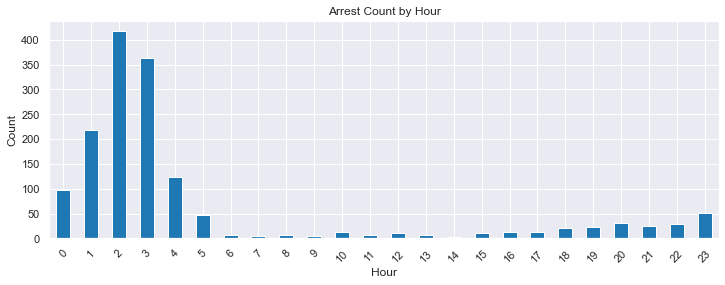

In [146]:
# Create a vertical bar graph of the arrest count by hour
hourly.plot(
    x='hour', 
    kind='bar',
    figsize=(12,4),
    rot=45
)

plt.title("Arrest Count by Hour")
plt.xlabel('Hour')
plt.ylabel('Count')

In [217]:
hourly = ba_data.groupby(['hour']).size().sort_values(ascending=False)
hourly.head()

hour
2    417
3    364
1    219
4    124
0     98
dtype: int64

Which hours of the day have the most and least breathalyzer tests?
- 2 am is the most common time of day for breathalyzer tests to be administered, 
- Hours 14 has the least breathalyzer tests. 

*** 

### Part 4.

Now that we have discovered which time of day is most common for breath alcohol tests, we will determine which time of the year has the most breathalyzer tests. Which month will have the most recorded tests?



- Using `groupby()` and `size()`, summarize the data by month. Save this as `monthly`
- Create a bar chart of total breath alcohol tests by month using `plot.bar` on the monthly Series

In [147]:
# Convert month integer to month name. Ex 12 will be December
ba_data['month_name'] = pd.to_datetime(ba_data.month, format='%m').dt.month_name()
ba_data

,year,month,day,hour,departments,gender,res1,res2,month_name
0,2017,12,17,1,AMES PD,M,0.046,0.046,December
1,2017,12,14,3,ISU PD,F,0.121,0.120,December
2,2017,12,10,5,ISU PD,F,0.068,0.067,December
3,2017,12,10,3,ISU PD,F,0.077,0.077,December
4,2017,12,9,2,ISU PD,M,0.085,0.084,December
...,...,...,...,...,...,...,...,...,...
1551,2013,1,5,23,AMES PD,M,0.182,0.181,January
1552,2013,1,4,2,ISU PD,M,0.066,0.065,January
1553,2013,1,1,3,AMES PD,M,0.090,0.090,January
1554,2013,1,1,2,ISU PD,F,0.132,0.131,January


In [148]:
# Count by month and arrange by descending frequency
monthly = ba_data.groupby(['month_name']).size().sort_values(ascending=False)
monthly.head()

month_name
August       167
April        159
September    146
March        145
January      145
dtype: int64

Text(0, 0.5, 'Count')

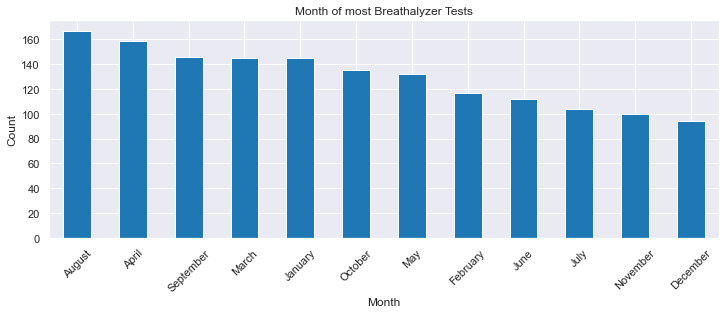

In [149]:
# Use plot.bar to make the appropriate bar chart
monthly.plot(
    x='month_name', 
    kind='bar',
    figsize=(12,4),
    rot=45
    
)

plt.title("Month of most Breathalyzer Tests")
plt.xlabel('Month')
plt.ylabel('Count')

Which month will have the most recorded tests?
 - August is the time of the year that has the most breathalyzer tests.

***

# Part 5.

When we think of (binge) drinking in college towns in America, we usually think of the movie *Animal House*. And so, one might suspect that breath alcohol tests are given to men more often than women and that men drink more than women.


- Count the number of tests by gender using `value_counts()` to see which gender took more tests
- Remove the NA values in the gender variable with `dropna()` and save the results as `gen`
- In `gen`, use the `assign()` method to create a new variable called `meanRes`, the mean of the two tests `Res1` and `Res2`. Assign the resulting DataFrame to `mean_bas`. **Note:** To create the mean of the two columns, add the columns and divide by 2 (the number of columns) inside the `assign` method.
- Using `mean_bas`, create boxplots of mean results for men and women. Use `meanRes` on the y-axis and `gender` on the x-axis

In [219]:
# Count by gender
pd.DataFrame(ba_data['gender'].value_counts())

,gender
M,1102
F,425


In [221]:
pd.DataFrame(ba_data['gender'].value_counts(normalize=True))

,gender
M,0.721676
F,0.278324


Males took more tests than females. 
- Males 72% and Female 27.8%

In [228]:
show_NaN = ba_data.isnull().any(axis=1)
ba_data[show_NaN]

,year,month,day,hour,departments,gender,res1,res2,mean_res
43,2017,10,20,5,ISU PD,NaN,0.053,0.053,0.0530
59,2017,10,7,1,AMES PD,NaN,0.199,0.198,0.1985
157,2017,4,23,2,ISU PD,NaN,0.204,0.203,0.2035
171,2017,4,12,11,AMES PD,NaN,0.000,0.000,0.0000
172,2017,4,12,9,ISU PD,NaN,0.000,0.000,0.0000
244,2017,1,17,3,AMES PD,NaN,0.127,0.126,0.1265
279,2016,11,16,3,AMES PD,NaN,0.160,0.159,0.1595
280,2016,11,14,1,AMES PD,NaN,0.170,0.170,0.1700
363,2016,8,13,3,ISU PD,NaN,0.086,0.085,0.0855
396,2016,6,29,16,AMES PD,NaN,0.000,0.000,0.0000


In [229]:
# Create a dataset with no NAs in gender 
gen = ba_data.dropna(subset=['gender'],how='all')
gen

,year,month,day,hour,departments,gender,res1,res2,mean_res
0,2017,12,17,1,AMES PD,M,0.046,0.046,0.0460
1,2017,12,14,3,ISU PD,F,0.121,0.120,0.1205
2,2017,12,10,5,ISU PD,F,0.068,0.067,0.0675
3,2017,12,10,3,ISU PD,F,0.077,0.077,0.0770
4,2017,12,9,2,ISU PD,M,0.085,0.084,0.0845
...,...,...,...,...,...,...,...,...,...
1551,2013,1,5,23,AMES PD,M,0.182,0.181,0.1815
1552,2013,1,4,2,ISU PD,M,0.066,0.065,0.0655
1553,2013,1,1,3,AMES PD,M,0.090,0.090,0.0900
1554,2013,1,1,2,ISU PD,F,0.132,0.131,0.1315


In [230]:
# We want to get the new copy from gen to original ba_data in order to not have rows with missing genders.
ba_data = gen.copy()

In [195]:
def get_mean_of_results(row):
    '''Get mean of Res1 and Res 2 '''
    return (row['res1'] + row['res2'])/2

# Create a mean test result variable
ba_data['mean_res'] = ba_data.apply(get_mean_of_results, axis=1)

Text(0, 0.5, 'Mean of Results')

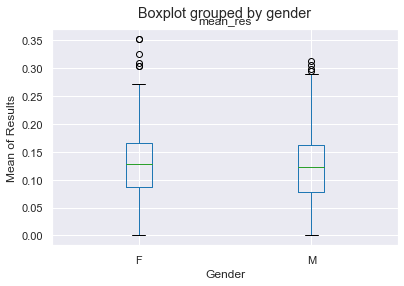

In [234]:
# Create side-by-side boxplots to compare the mean blood alcohol levels of men and women
ba_data.boxplot(
    ['mean_res'], 
    by = 'gender'
    
)
plt.xlabel('Gender')
plt.ylabel('Mean of Results')


While Males took more tests, Females had the highest number of Breath Alcohol test level. 

***

### Part 6.

In the USA, it is illegal to drive with a blood alcohol concentration (BAC) above 0.08%. This is the case for all 50 states. Assuming everyone tested in our data was driving (though we have no way of knowing this from the data), if either of the results (Res1, Res2) are above 0.08, the person would be charged with DUI (driving under the influence).


- Filter the `ba_data` to include only tests where one or both of `Res1`, `Res2` are greater than 0.08. Call this filtered data `duis`
- Create a variable, `p_dui`, for the proportion of all tests that would have resulted in a DUI and print the proportion
- **Note:** To calculate `p_dui`, use the `shape()` attribute of the `duis` and `ba_data` DataFrames to obtain the number of rows of each

In [161]:
# Filter the data
duis = ba_data[(ba_data['res1'] > 0.08) | (ba_data['res2'] > 0.08)]
duis 

,year,month,day,hour,departments,gender,res1,res2,month_name,mean_res
1,2017,12,14,3,ISU PD,F,0.121,0.120,December,0.1205
4,2017,12,9,2,ISU PD,M,0.085,0.084,December,0.0845
5,2017,12,9,1,AMES PD,M,0.160,0.161,December,0.1605
6,2017,12,7,3,AMES PD,M,0.131,0.131,December,0.1310
8,2017,12,3,1,AMES PD,M,0.091,0.090,December,0.0905
...,...,...,...,...,...,...,...,...,...,...
1550,2013,1,6,1,ISU PD,F,0.085,0.085,January,0.0850
1551,2013,1,5,23,AMES PD,M,0.182,0.181,January,0.1815
1553,2013,1,1,3,AMES PD,M,0.090,0.090,January,0.0900
1554,2013,1,1,2,ISU PD,F,0.132,0.131,January,0.1315


In [162]:
print(duis.shape)
print(ba_data.shape)

(1150, 10)
(1527, 10)


In [222]:
# Proportion of tests that would have resulted in a DUI
p_dui = duis.shape[0] / ba_data.shape[0]
print(f"Proportion of tests that would have resulted in a DUI: {p_dui:.2%}")

Proportion of tests that would have resulted in a DUI: 73.91%


***

### Part 7.

We previously saw that 2am is the most common time of day for breathalyzer tests to be administered, and August is the most common month of the year for breathalyzer tests. Now, we look at the weeks in the year over time.

- Create a new column in `ba_data` called `date` by using `to_datetime()` to combine the date variables in the order of year, month, day
- Using the new `date` variable, create another new column in `ba_data` called `week` using `dt.week`

In [165]:
# Create date variable
date = ba_data[['year', 'month', 'day']]
ba_data['date'] = pd.to_datetime(date)

In [166]:
# Create week number
ba_data['week'] = ba_data['date'].dt.week

In [167]:
#Create Week Day name
ba_data['week_name'] = ba_data['date'].dt.day_name()

In [168]:
ba_data.head()

,year,month,day,hour,departments,gender,res1,res2,month_name,mean_res,date,week,week_name
0,2017,12,17,1,AMES PD,M,0.046,0.046,December,0.0460,2017-12-17,50,Sunday
1,2017,12,14,3,ISU PD,F,0.121,0.120,December,0.1205,2017-12-14,50,Thursday
2,2017,12,10,5,ISU PD,F,0.068,0.067,December,0.0675,2017-12-10,49,Sunday
3,2017,12,10,3,ISU PD,F,0.077,0.077,December,0.0770,2017-12-10,49,Sunday
4,2017,12,9,2,ISU PD,M,0.085,0.084,December,0.0845,2017-12-09,49,Saturday


***

### Part 8.

How do the weeks differ over time? One of the most common data visualizations is the time series, a line tracking the changes in a variable over time. We will use the new week variable to look at test frequency over time. We end with a time series plot showing the frequency of breathalyzer tests by week in year, with one line for each year.


- Group `ba_data` by the `week` and `year` columns and `count()` the number arrests per week in each year. Assign the result to `timeline`
- Turn index values of `timeline` into column names using `unstack()`, then create a line plot using `plot()`. `week` should be the x-axis and the count variable on the y-axis, colored by `year`. Title the graph `'VEISHEA DUIS'` and include a legend.

In [171]:
# Choose and count the variables of interest  
timeline = ba_data.groupby(['week','year']).count()['res1']
timeline

week  year
1     2013    6
      2014    5
      2015    5
      2016    6
      2017    5
             ..
52    2014    5
      2015    3
      2016    2
53    2015    4
      2016    1
Name: res1, Length: 259, dtype: int64

In [235]:
# Unstack
timeline = timeline.unstack()
timeline.head()

year  week
2013  1        6.0
      2       12.0
      3        8.0
      4        6.0
      5        5.0
dtype: float64

Text(0, 0.5, 'Count')

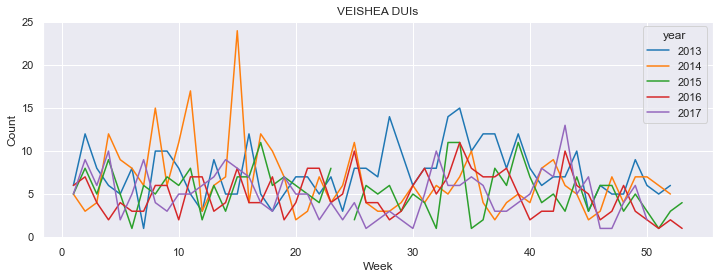

In [173]:
#Plot
timeline.plot(
    legend=True,
    figsize=(12,4)
)

plt.title('VEISHEA DUIs', loc='center')
plt.xlabel('Week')
plt.ylabel('Count')

***

### Check For Duplicates

In [174]:
duplicateRowsDF = ba_data.duplicated()
ba_data[duplicateRowsDF]

,year,month,day,hour,departments,gender,res1,res2,month_name,mean_res,date,week,week_name
187,2017,3,30,15,AMES PD,M,0.0,0.0,March,0.0,2017-03-30,13,Thursday
188,2017,3,30,15,AMES PD,M,0.0,0.0,March,0.0,2017-03-30,13,Thursday
233,2017,1,26,5,AMES PD,M,0.0,0.0,January,0.0,2017-01-26,4,Thursday
606,2015,9,16,13,AMES PD,M,0.0,0.0,September,0.0,2015-09-16,38,Wednesday
678,2015,6,3,16,AMES PD,M,0.0,0.0,June,0.0,2015-06-03,23,Wednesday


In [175]:
ba_data.drop_duplicates(inplace=True)

### Data Wrangling Summary

In [127]:
ba_data.shape

(1527, 14)

In [128]:
ba_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1527 entries, 0 to 1555
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        1527 non-null   int64         
 1   month       1527 non-null   int64         
 2   day         1527 non-null   int64         
 3   hour        1527 non-null   int64         
 4   location    1527 non-null   object        
 5   gender      1527 non-null   object        
 6   Res1        1527 non-null   float64       
 7   Res2        1527 non-null   float64       
 8   month_name  1527 non-null   object        
 9   meanRes     1527 non-null   float64       
 10  mean_res    1527 non-null   float64       
 11  date        1527 non-null   datetime64[ns]
 12  week        1527 non-null   int64         
 13  week_name   1527 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 178.9+ KB


In [241]:
ba_data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1527.0,2014.769483,1.425029,2013.0,2013.0000,2015.000,2016.0000,2017.0000
month,1527.0,6.260642,3.377540,1.0,3.0000,6.000,9.0000,12.0000
day,1527.0,15.922069,8.678914,1.0,8.0000,16.000,24.0000,31.0000
hour,1527.0,5.062868,6.465351,0.0,2.0000,3.000,4.0000,23.0000
res1,1527.0,0.118806,0.066670,0.0,0.0810,0.124,0.1640,0.3520
res2,1527.0,0.118361,0.066468,0.0,0.0800,0.124,0.1630,0.3510
mean_res,1527.0,0.118583,0.066568,0.0,0.0805,0.124,0.1635,0.3515


## Export Data

In [42]:
#To CSV
ba_data.to_csv('Team5_Final.csv', index=False)

***

From Wikipedia: "VEISHEA was an annual week-long celebration held each spring on the campus of Iowa State University in Ames, Iowa. The celebration featured an annual parade and many open-house demonstrations of the university facilities and departments. Campus organizations exhibited products, technologies, and held fundraisers for various charity groups. In addition, VEISHEA brought speakers, lecturers, and entertainers to Iowa State. [...] VEISHEA was the largest student-run festival in the nation, bringing in tens of thousands of visitors to the campus each year."

This over 90-year tradition in Ames was terminated permanently after riots in 2014, where drunk celebrators flipped over multiple vehicles and tore light poles down. This was not the first incidence of violence and severe property damage in VEISHEA's history. Judging from the plot you created above, did former President Leath make the right decision by canceling VEISHEA?